In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

%config InlineBackend.figure_formats = ['svg']

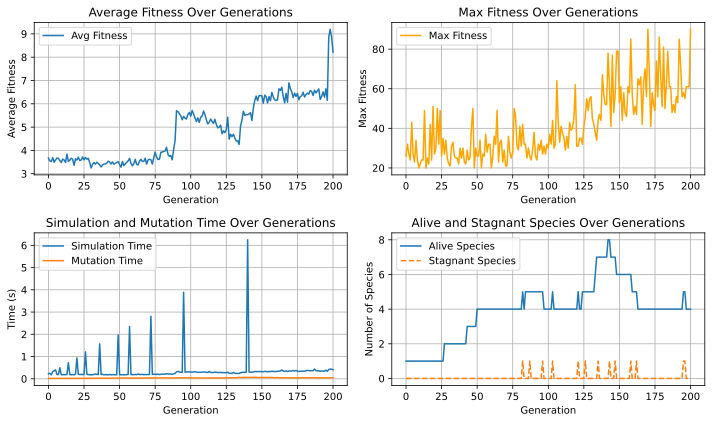

In [60]:
path = '/Users/so/Documents/projects/personal/2048_AI/logs/2024-12-29_18-42-15.v2.txt'
with open(path, 'r') as f:
    log_data = f.read()

# Convert log data into a list of dictionaries
lines = log_data.strip().split('\n')
data = [eval(line) for line in lines]

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Create a 2x2 subplot for all the graphs
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot avg_fitness over generations
axes[0, 0].plot(df["current_gen"], df["avg_fitness"], label="Avg Fitness")
axes[0, 0].set_title("Average Fitness Over Generations")
axes[0, 0].set_xlabel("Generation")
axes[0, 0].set_ylabel("Average Fitness")
axes[0, 0].grid()
axes[0, 0].legend()

# Plot max_fitness over generations
axes[0, 1].plot(df["current_gen"], df["max_fitness"], label="Max Fitness", color="orange")
axes[0, 1].set_title("Max Fitness Over Generations")
axes[0, 1].set_xlabel("Generation")
axes[0, 1].set_ylabel("Max Fitness")
axes[0, 1].grid()
axes[0, 1].legend()

# Plot sim_time and mutate_time over generations (combined graph)
axes[1, 0].plot(df["current_gen"], df["sim_time"], label="Simulation Time")
axes[1, 0].plot(df["current_gen"], df["mutate_time"], label="Mutation Time")
axes[1, 0].set_title("Simulation and Mutation Time Over Generations")
axes[1, 0].set_xlabel("Generation")
axes[1, 0].set_ylabel("Time (s)")
axes[1, 0].grid()
axes[1, 0].legend()

# Plot alive_species and stagnant_species over generations (combined graph)
axes[1, 1].plot(df["current_gen"], df["alive_species"], label="Alive Species")
axes[1, 1].plot(df["current_gen"], df["stagnant_species"], label="Stagnant Species", linestyle="--")
axes[1, 1].set_title("Alive and Stagnant Species Over Generations")
axes[1, 1].set_xlabel("Generation")
axes[1, 1].set_ylabel("Number of Species")
axes[1, 1].grid()
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


network complexity

In [4]:
path = '/Users/so/Documents/projects/personal/2048_AI/logs/counts.txt'
with open(path, 'r') as f:
    log_data = f.read()


d = {int(data.split(', ')[0]): data.split(', ')[1:] for data in log_data.split('\n')[:-1]}
d = pd.DataFrame(d)
d = d.iloc[:-1]
d = d.astype(int)
d = d.T

In [5]:
d

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,20,64,20,64,20,64,20,64,20,64,...,20,64,20,64,20,64,20,64,20,64
1,20,64,20,64,20,64,20,64,20,64,...,20,64,20,64,20,64,20,64,20,64
2,20,64,20,64,20,64,20,64,20,64,...,20,64,20,64,20,64,20,64,20,64
3,20,64,20,64,20,64,20,64,20,64,...,20,64,20,64,20,64,20,64,20,64
4,20,64,20,64,20,64,20,64,20,64,...,21,66,20,64,20,64,20,64,20,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,22,68,22,68,21,68,23,72,21,68,...,23,72,23,72,23,72,23,72,23,72
196,22,68,22,69,21,68,23,72,22,68,...,23,72,23,72,23,72,23,72,23,72
197,22,68,22,68,21,68,23,72,22,69,...,24,74,23,72,23,72,23,72,23,72
198,22,68,22,68,21,68,23,72,22,70,...,23,72,23,72,23,72,23,72,23,72


In [6]:
nuerons = d[[i*2 for i in range(1000)]]
synapses = d[[i*2 + 1 for i in range(1000)]]

nd = nuerons.T.describe()
sd = synapses.T.describe()

In [7]:
nd

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.0,20.0,20.002000,20.005000,20.006000,20.004000,20.002000,20.004000,20.002000,20.003000,...,22.076000,22.082000,22.060000,22.040000,22.029000,22.040000,22.043000,22.055000,22.039000,22.0800
std,0.0,0.0,0.044699,0.070569,0.077266,0.063151,0.044699,0.063151,0.044699,0.054717,...,0.703362,0.709774,0.723134,0.724517,0.721581,0.724517,0.749475,0.739271,0.758983,0.7471
min,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0000
25%,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,22.000000,21.750000,22.0000
50%,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0000
75%,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0000
max,20.0,20.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,23.000000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0000


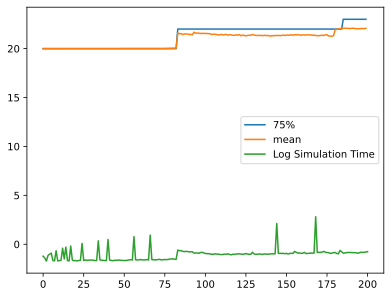

In [8]:
plt.plot(nd.columns, nd.loc['75%'], label = '75%')
plt.plot(nd.columns, nd.loc['mean'], label = 'mean')
plt.plot(df["current_gen"], np.log(df["sim_time"]), label="Log Simulation Time")
plt.legend()

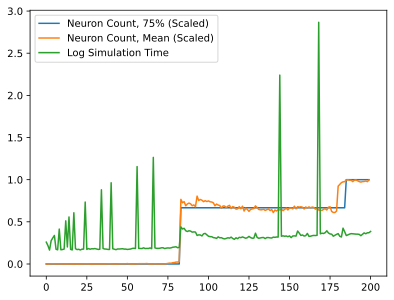

In [9]:
# Normalize the columns
nd.loc['75%_scaled'] = (nd.loc['75%'] - nd.loc['75%'].min()) / (nd.loc['75%'].max() - nd.loc['75%'].min())
nd.loc['mean_scaled'] = (nd.loc['mean'] - nd.loc['mean'].min()) / (nd.loc['mean'].max() - nd.loc['mean'].min())
df['sim_time_scaled'] = np.log(df['sim_time'] + 1)

# Plot the scaled values
plt.plot(nd.columns, nd.loc['75%_scaled'], label='Neuron Count, 75% (Scaled)')
plt.plot(nd.columns, nd.loc['mean_scaled'], label='Neuron Count, Mean (Scaled)')
plt.plot(df['current_gen'], df['sim_time_scaled'], label='Log Simulation Time')
plt.legend()
plt.show()


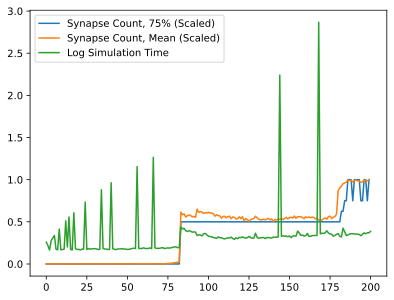

In [10]:
# Normalize the columns
sd.loc['75%_scaled'] = (sd.loc['75%'] - sd.loc['75%'].min()) / (sd.loc['75%'].max() - sd.loc['75%'].min())
sd.loc['mean_scaled'] = (sd.loc['mean'] - sd.loc['mean'].min()) / (sd.loc['mean'].max() - sd.loc['mean'].min())
df['sim_time_scaled'] = np.log(df['sim_time'] + 1)

# Plot the scaled values
plt.plot(sd.columns, sd.loc['75%_scaled'], label='Synapse Count, 75% (Scaled)')
plt.plot(sd.columns, sd.loc['mean_scaled'], label='Synapse Count, Mean (Scaled)')
plt.plot(df['current_gen'], df['sim_time_scaled'], label='Log Simulation Time')
plt.legend()
plt.show()

nn_init times

In [11]:
path = '/Users/so/Documents/projects/personal/2048_AI/logs/2024-12-24_12-44-37.txt'
with open(path, 'r') as f:
    log_data = f.read()

# Convert log data into a list of dictionaries
lines = log_data.strip().split('\n')
data = [eval(line) for line in lines]

# Create a pandas DataFrame
df = pd.DataFrame(data)

In [12]:
path = '/Users/so/Documents/projects/personal/2048_AI/logs/nn_init.txt'
with open(path, 'r') as f:
    log_data = f.read()


d = {int(data.split(', ')[0]): data.split(', ')[1:] for data in log_data.split('\n')[:-1]}
d = pd.DataFrame(d)
d = d.iloc[:-1]
d = d.astype(float)
d = d.T
d

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000029,0.000080,0.000016,0.000052,0.000013,0.000048,0.000012,0.000050,0.000012,0.000053,...,0.000016,0.000050,0.000036,0.000049,0.000017,0.000049,0.000012,0.000056,0.000038,0.000049
1,0.000017,0.000058,0.000016,0.000061,0.000015,0.000050,0.000016,0.000057,0.000013,0.000050,...,0.000012,0.000048,0.000013,0.000047,0.000011,0.000046,0.000011,0.000047,0.000012,0.000069
2,0.000022,0.000063,0.000017,0.000070,0.000017,0.000083,0.000017,0.000055,0.000014,0.000054,...,0.000015,0.000060,0.000017,0.000077,0.000013,0.000061,0.000012,0.000049,0.000012,0.000078
3,0.000020,0.000060,0.000019,0.000065,0.000017,0.000059,0.000017,0.000059,0.000015,0.000059,...,0.000013,0.000048,0.000014,0.000047,0.000013,0.000051,0.000011,0.000050,0.000019,0.000047
4,0.000018,0.000057,0.000018,0.000059,0.000016,0.000064,0.000016,0.000062,0.000019,0.000073,...,0.000013,0.000049,0.000013,0.000050,0.000012,0.000051,0.000011,0.000048,0.000012,0.000073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.000013,0.000027,0.000009,0.000027,0.000010,0.000025,0.000011,0.000030,0.000011,0.000026,...,0.000004,0.000018,0.000010,0.000016,0.000005,0.000016,0.000004,0.000041,0.000004,0.000017
197,0.000014,0.000034,0.000014,0.000035,0.000013,0.000034,0.000014,0.000039,0.000014,0.000078,...,0.000004,0.000016,0.000004,0.000016,0.000004,0.000019,0.000004,0.000017,0.000028,0.000017
198,0.000012,0.000026,0.000012,0.000032,0.000011,0.000033,0.000010,0.000029,0.000022,0.000034,...,0.000009,0.000018,0.000010,0.000019,0.000004,0.000026,0.000032,0.000018,0.000007,0.000018
199,0.000015,0.000038,0.000015,0.000031,0.000013,0.000031,0.000011,0.000028,0.000012,0.000032,...,0.000005,0.000019,0.000005,0.000020,0.000005,0.000021,0.000006,0.000018,0.000007,0.000048


In [13]:
n_exp = d[[i*2 for i in range(1000)]]
s_exp = d[[i*2 + 1 for i in range(1000)]]

n_exp_d = n_exp.T.describe()
s_exp_d = s_exp.T.describe()

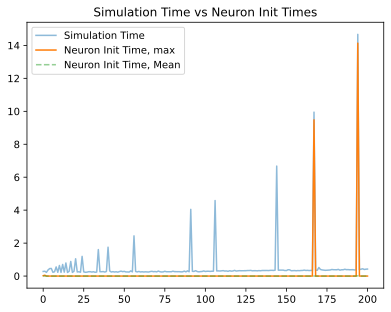

In [14]:
# Normalize the columns
n_exp_d.loc['75%_scaled'] = (n_exp_d.loc['75%'] - n_exp_d.loc['75%'].min()) / (n_exp_d.loc['75%'].max() - n_exp_d.loc['75%'].min())
n_exp_d.loc['max_scaled'] = (n_exp_d.loc['max'] - n_exp_d.loc['max'].min()) / (n_exp_d.loc['max'].max() - n_exp_d.loc['max'].min())
n_exp_d.loc['mean_scaled'] = (n_exp_d.loc['mean'] - n_exp_d.loc['mean'].min()) / (n_exp_d.loc['mean'].max() - n_exp_d.loc['mean'].min())
n_exp_d.loc['max_scaled'] = (n_exp_d.loc['max'] - n_exp_d.loc['max'].min()) / (n_exp_d.loc['max'].max() - n_exp_d.loc['max'].min())

df['sim_time_scaled'] = np.log(df['sim_time'] + 1)

# Plot the scaled values
# plt.plot(n_exp_d.columns, n_exp_d.loc['75%_scaled'], label='Neuron Init Time, 75% (Scaled)')
plt.plot(df['current_gen'], df['sim_time'], label='Simulation Time', alpha = 0.5)
plt.plot(n_exp_d.columns, n_exp_d.loc['max'], label='Neuron Init Time, max', alpha = 1)
plt.plot(n_exp_d.columns, n_exp_d.loc['mean'], label='Neuron Init Time, Mean', alpha = 0.5, linestyle = '--')
plt.title('Simulation Time vs Neuron Init Times')
plt.legend()
plt.show()

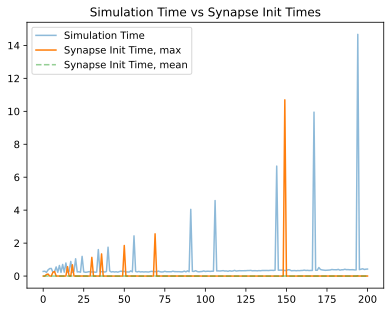

In [15]:
# Normalize the columns
s_exp_d.loc['75%_scaled'] = (s_exp_d.loc['75%'] - s_exp_d.loc['75%'].min()) / (s_exp_d.loc['75%'].max() - s_exp_d.loc['75%'].min())
s_exp_d.loc['mean_scaled'] = (s_exp_d.loc['mean'] - s_exp_d.loc['mean'].min()) / (s_exp_d.loc['mean'].max() - s_exp_d.loc['mean'].min())
s_exp_d.loc['50%_scaled'] = (s_exp_d.loc['50%'] - s_exp_d.loc['50%'].min()) / (s_exp_d.loc['50%'].max() - s_exp_d.loc['50%'].min())
s_exp_d.loc['max_scaled'] = (s_exp_d.loc['max'] - s_exp_d.loc['max'].min()) / (s_exp_d.loc['max'].max() - s_exp_d.loc['max'].min())
df['sim_time_scaled'] = np.log(df['sim_time'] + 1)

# Plot the scaled values
plt.plot(df['current_gen'], df['sim_time'], label='Simulation Time', alpha = 0.5)
plt.plot(s_exp_d.columns, s_exp_d.loc['max'], label='Synapse Init Time, max', alpha = 1)
plt.plot(n_exp_d.columns, n_exp_d.loc['mean'], label='Synapse Init Time, mean', alpha = 0.5, linestyle = '--')

# plt.plot(s_exp_d.columns, s_exp_d.loc['50%_scaled'], label='Neuron Init Time, Median (Scaled)')
plt.title('Simulation Time vs Synapse Init Times')
plt.legend()
plt.show()

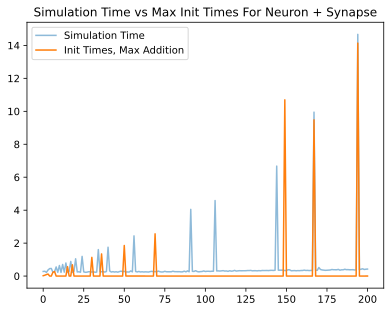

In [16]:
plt.plot(df['current_gen'], df['sim_time'], label='Simulation Time', alpha = 0.5)
plt.plot(s_exp_d.columns, s_exp_d.loc['max'] + n_exp_d.loc['max'], label='Init Times, Max Addition', alpha = 1)

plt.title('Simulation Time vs Max Init Times For Neuron + Synapse')
plt.legend()
plt.show()